<a href="https://colab.research.google.com/github/500081/M7DataSP/blob/main/DU_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Piskovský, Trembaczová, Halaštová

Rozlišujeme jestli má pacient diabetes pomocí
hodnot naměřených při vyšetření. Konkrétně známe kolikrát byl těhotný, glukózu, krevní tlak, tloušťku kůže, inzulín, BMI, pravděpodobnost diabetu z funkce, která ji predikuje a věk.

Predikce modelu nejsou moc dobré, hlavně máme hodně falešně negativních predikcí, což je u medicínských dat velmi nežádoucí, ale pomocí jiných modelů jsme nedosáhli lepších výsledků a proto zůstáváme u původního modelu.

Pomocí permutací na jednotlivých proměnných jsme zjistili, že nejdůležitější proměnná v modelu je hodnota glukózy, což je u cukrovky logicky užitečný ukazatel. Dále jsou užitečné i hodnoty BMI, funkce pravděpodobnosti cukrovky a počet těhotenství, což jsou také relevantní ukazatele. Ostatní proměnné se ukazují jako méně důležité, žádná proměnná ale neměla zápornou hodnotu, takže model necháváme na celých datech.

In [9]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [10]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
numerical_features = ['Pregnancies', 'Age', 'Glucose', 'BloodPressure', 'SkinThickness', "Insulin", "BMI", "DiabetesPedigreeFunction"]

Check class balance:

<Axes: >

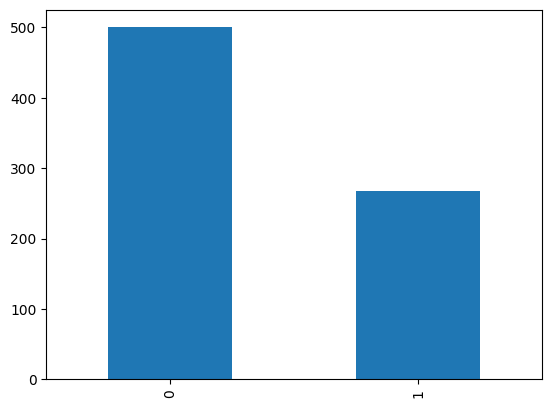

In [12]:
df.Outcome.value_counts().plot.bar()

Preprocess data:

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# normalization
mms = MinMaxScaler()

# standardization
ss = StandardScaler()

for numerical_feature in numerical_features:
  df[numerical_feature] = mms.fit_transform(df[[numerical_feature]])
  df[numerical_feature] = ss.fit_transform(df[[numerical_feature]])

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


Check correlations:

In [14]:
correlations = df.corr(method ='pearson')
correlations.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
from sklearn.model_selection import train_test_split

labels = df['Outcome']
df = df[df.columns.drop(["Outcome"])]

x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.2)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
146,1.530847,-1.999716,0.563223,1.032726,-0.692891,0.102477,-1.135191,0.660206
128,-0.844885,-0.121888,0.976805,0.217261,0.566129,0.318240,-0.208015,0.575118
242,-0.250952,0.566649,-0.780919,-1.288212,-0.692891,-0.811341,-0.211035,-0.956462
50,-0.844885,-0.560048,0.563223,-0.598204,0.019107,-1.598241,0.057756,-0.956462
340,-0.844885,0.284975,0.046245,-0.472747,0.218813,-0.773265,0.000374,-0.956462
...,...,...,...,...,...,...,...,...
209,0.936914,1.975021,0.770014,0.781814,-0.692891,0.445159,-0.352980,0.660206
471,-1.141852,0.504055,0.046245,1.095454,-0.692891,0.153245,-0.911702,-0.956462
328,-0.547919,-0.591345,0.873409,0.969998,0.349057,1.714352,-1.041567,-0.871374
729,-0.547919,-0.904316,-0.884314,-1.288212,-0.692891,-0.240205,-0.999286,-0.956462


In [32]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2')
classifier_lr

LogisticRegression(C=10, random_state=0)

Train:

In [33]:
classifier_lr.fit(x_train, y_train)

LogisticRegression(C=10, random_state=0)

Test:

Accuracy: 80.519 %


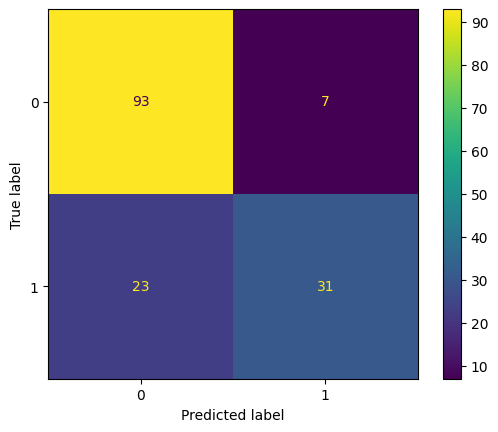

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted = classifier_lr.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predicted)*100:.5} %')

cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

Interpret the model:

In [35]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(classifier_lr,
                                x_test,
                                y_test,
                                n_repeats=20,
                                # random_state=42,
                                n_jobs=2)

elapsed_time = time.time() - start_time
print(f'Elapsed time to compute the importances: {elapsed_time:.3f} seconds')

result

Elapsed time to compute the importances: 1.538 seconds


{'importances_mean': array([0.02305195, 0.13409091, 0.00097403, 0.        , 0.00487013,
        0.04090909, 0.01493506, 0.00357143]),
 'importances_std': array([0.01369422, 0.02599634, 0.01052569, 0.        , 0.00677164,
        0.02983482, 0.01510351, 0.01036421]),
 'importances': array([[ 0.03246753,  0.01948052,  0.00649351,  0.03896104,  0.02597403,
          0.01948052,  0.03246753,  0.01948052, -0.00649351,  0.02597403,
          0.03246753,  0.00649351,  0.03246753,  0.01948052,  0.01298701,
          0.01298701,  0.01948052,  0.01298701,  0.05194805,  0.04545455],
        [ 0.14285714,  0.0974026 ,  0.1038961 ,  0.16233766,  0.11038961,
          0.13636364,  0.16883117,  0.13636364,  0.16883117,  0.14935065,
          0.11688312,  0.06493506,  0.14935065,  0.12337662,  0.15584416,
          0.15584416,  0.15584416,  0.13636364,  0.12987013,  0.11688312],
        [ 0.00649351,  0.00649351,  0.00649351, -0.01298701,  0.00649351,
          0.00649351,  0.00649351,  0.00649351,  0

In [36]:
feature_importances = pd.Series(result.importances_mean, index=df.columns)
feature_importances

Pregnancies                 0.023052
Glucose                     0.134091
BloodPressure               0.000974
SkinThickness               0.000000
Insulin                     0.004870
BMI                         0.040909
DiabetesPedigreeFunction    0.014935
Age                         0.003571
dtype: float64

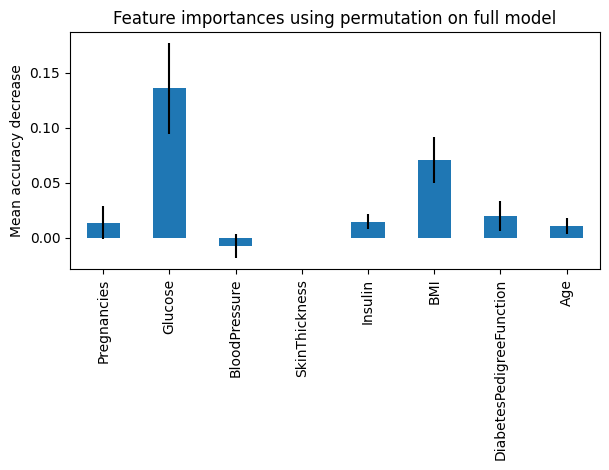

In [ ]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title('Feature importances using permutation on full model')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()